In [1]:
!pip install numpy
!pip install pandas 
!pip install matplotlib
!pip install seaborn 
!pip install yfinance
!pip install datetime

In [2]:
# Import all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
import yfinance as yf # helps to access the data from yahoo finance 

In [3]:
#Downloading the data
company_name = 'NVDA'
start_date = date.datetime(2018,1,1)
end_date = date.datetime(2024,10,7)
nivida_stock_data = yf.download(company_name, start=start_date, end=end_date)
# Converting index into column
nivida_stock_data = nivida_stock_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [4]:
# Looking into dataset
nivida_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,4.89450,4.98750,4.86250,4.98375,4.930221,355616000
1,2018-01-03,5.10250,5.34250,5.09375,5.31175,5.254700,914704000
2,2018-01-04,5.39400,5.45125,5.31725,5.33975,5.282396,583268000
3,2018-01-05,5.35475,5.42275,5.27700,5.38500,5.327161,580124000
4,2018-01-08,5.51000,5.62500,5.46450,5.55000,5.490389,881216000


In [5]:
# Analyze the data structure 
nivida_stock_data.info()
nivida_stock_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1701 non-null   datetime64[ns]
 1   Open       1701 non-null   float64       
 2   High       1701 non-null   float64       
 3   Low        1701 non-null   float64       
 4   Close      1701 non-null   float64       
 5   Adj Close  1701 non-null   float64       
 6   Volume     1701 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 93.2 KB


(1701, 7)

In [6]:
# Checking the missing values 
nivida_stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Checking for redundent values 
nivida_stock_data.duplicated().sum()

0

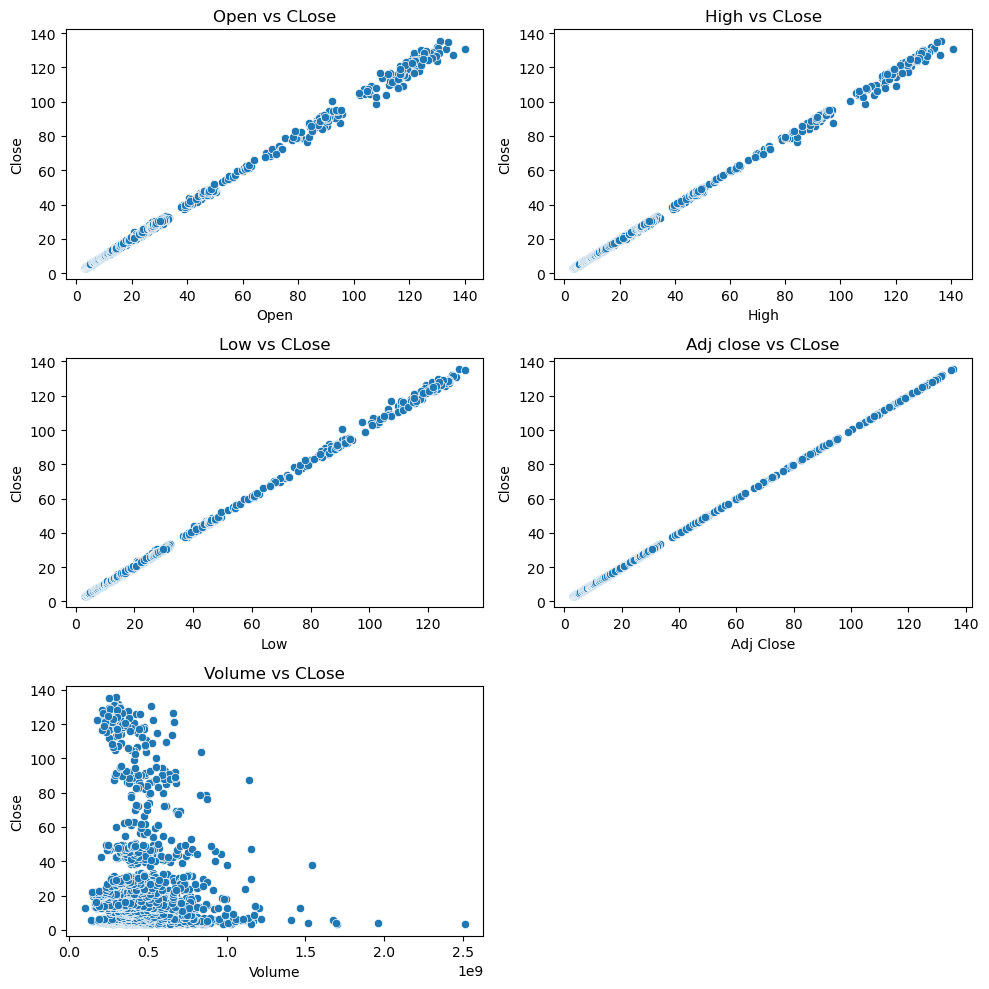

In [8]:
# Performing the EDA(Exploratory data analysis)
# Analyzing the relationship between each feature variables and target variable visually 
# Plotting the scatter plot
plt.figure(figsize = (10,10)) # declaring the grid size 
# Relationship between Open vs CLose 
plt.subplot(3,2,1)
sns.scatterplot(x = 'Open', y = 'Close', data = nivida_stock_data)
plt.title('Open vs CLose')
# Relationship between High vs CLose 
plt.subplot(3,2,2)
sns.scatterplot(x = 'High', y = 'Close', data = nivida_stock_data )
plt.title('High vs CLose')
# Relationship between Low vs CLose 
plt.subplot(3,2,3)
sns.scatterplot(x = 'Low', y = 'Close', data = nivida_stock_data  )
plt.title('Low vs CLose')
# Relationship between Adj Close vs CLose 
plt.subplot(3,2,4)
sns.scatterplot(x = 'Adj Close', y = 'Close', data = nivida_stock_data  )
plt.title('Adj close vs CLose')
# Relationship between Volume vs CLose
plt.subplot(3,2,5)
sns.scatterplot(x = 'Volume', y = 'Close', data = nivida_stock_data  )
plt.title('Volume vs CLose')
# Managing the grid 
plt.tight_layout()
plt.show()

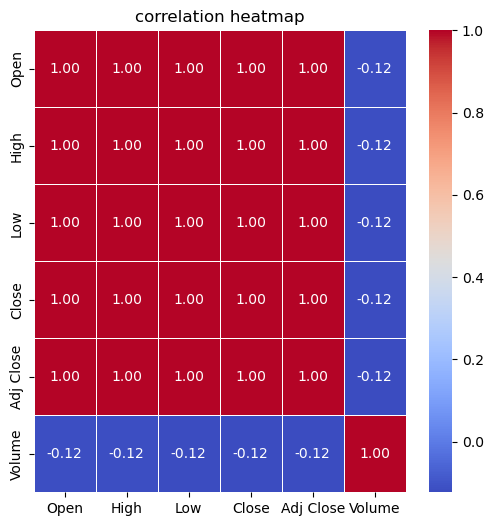

In [9]:
# Analyzing the heatmap
# Calculating the correlation matrix
correlation_matrix = nivida_stock_data.drop(columns = ['Date']).corr()
# Allocating the grid size 
plt.figure(figsize = (6,6))
# Displaying the heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt ='.2f', linewidth = 0.5)
# Declaring the tittle
plt.title('correlation heatmap')
# Displaying the graph
plt.show()

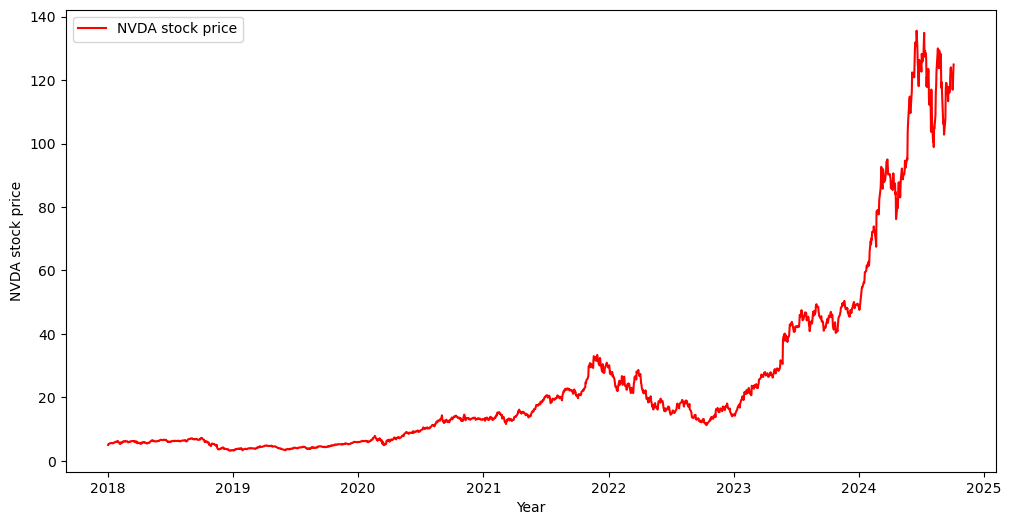

In [10]:
# Displaying history of fluctuation of price (2018 to till 2024 oct 10) 
plt.figure(figsize = (12,6))
plt.plot(nivida_stock_data['Date'], nivida_stock_data['Close'], color = 'red', label = f'{company_name} stock price' )
plt.xlabel('Year')
plt.ylabel(f'{company_name} stock price' )
plt.legend()
plt.show()

In [11]:
# Declaring the feature variables and target variables 
feature_variables_data = nivida_stock_data.drop(columns = ['Close', 'Date','Volume'])
target_variables_data = nivida_stock_data['Close']
feature_variables_data.head()

,Open,High,Low,Adj Close
0,4.89450,4.98750,4.86250,4.930221
1,5.10250,5.34250,5.09375,5.254700
2,5.39400,5.45125,5.31725,5.282396
3,5.35475,5.42275,5.27700,5.327161
4,5.51000,5.62500,5.46450,5.490389


In [12]:
# Allocate the 80% of data for training 
train_size = int(0.8*len(feature_variables_data))
feature_trained_data = feature_variables_data[:train_size]
feature_test_data  = feature_variables_data[train_size:]
target_trained_data = target_variables_data[:train_size]
target_test_data = target_variables_data[train_size:]

# Displaying the training and testing data
print(f'Training:{feature_trained_data .shape}, {target_trained_data.shape}')
print(f'Testing:{feature_test_data.shape}, {target_test_data.shape}')

Training:(1360, 4), (1360,)
Testing:(341, 4), (341,)


In [13]:
# Method for Normalizing the data with standardization by numpy 
def scaler(data):
    # Calculating the mean 
    mean = np.mean(data)
    # Calculating the standard_deviation
    standard_deviation = np.std(data)
    # Furmula: convertion = (input - mean) diviaded by standard deviation 
    normalized_data = (data - mean) / standard_deviation  
    return normalized_data

In [14]:
# converstion 
# Arguments are passed in numpy array 
feature_trained_data_normalize = scaler(feature_trained_data.values)
target_trained_data_normalize = scaler(target_trained_data.values)
feature_test_data_normalize = scaler(feature_test_data.values)
target_test_data_normalize = scaler(target_test_data.values)

In [15]:
# Define the Activation function: we are using Sigmoid 

# Define the Sigmoid activation function
def sigmoid(inputs):
    inputs = np.clip(inputs, -500, 500)  # Clipping the input range
    return 1 / (1 + np.exp(-inputs))

# Define the derivative of Sigmoid for backpropagation
def sigmoid_derivative(inputs):
    inputs = np.clip(inputs, -500, 500)  # Clipping the input range
    return inputs * (1 - inputs)


In [16]:
# Designing the FNN(FeedFoward neural network) model
class MLP():
    # Constructor 
    def __init__(self, input, output, hidden_layer_sizes):
        self.input_size = input.shape[1] # counting the number of features
        self.total_hidden_layer = len(hidden_layer_sizes)
        print(hidden_layer_sizes[0])
        # Converting the dimension
        self.output_size = output
        self.w = []
        self.b = []
        self.computed_h = []
        self.h = []
        self.error_hidden_h = []
        self.dw = []
        self.db = []
 
        #Initialize weights and biases
        for i in range(self.total_hidden_layer+1):
            if i == 0:
                self.w.append(np.random.rand(self.input_size, hidden_layer_sizes[i])) 
                self.b.append(np.zeros((1, hidden_layer_sizes[i])))
            elif i == (self.total_hidden_layer):
                self.w.append(np.random.rand(hidden_layer_sizes[i-1], self.output_size))
                self.b.append(np.zeros((1, self.output_size )))
            else:
                self.w.append(np.random.rand(hidden_layer_sizes[i-1], hidden_layer_sizes[i]))
                self.b.append(np.zeros((1, hidden_layer_sizes[i])))

    # Passing forward
    def fit(self, input):
        for i in range(self.total_hidden_layer+1):
            if i == (self.total_hidden_layer):
                #self.computed_output= np.dot(self.h[i], self.w[i]) + self.b[i]
                self.computed_h.append(np.dot(self.h[i-1], self.w[i]) + self.b[i])
                output = sigmoid(self.computed_h[i])
            elif i == 0:
                #self.computed_h[i] = np.dot(input, self.w[i]) + self.b[i]
                self.computed_h.append(np.dot(input, self.w[i]) + self.b[i])
                #self.h[i] = sigmoid(self.computed_h[i])
                self.h.append(sigmoid(self.computed_h[i]))
            else:
                #self.computed_h[i] = np.dot(self.h[i-1],self.w[i]) + self.b[i]
                self.computed_h.append(np.dot(self.h[i-1],self.w[i]) + self.b[i])
                #self.h[i] = sigmoid(self.computed_h[i])
                self.h.append(sigmoid(self.computed_h[i]))
                
        return output

    # Backward passing
    def backward(self, input, output, fw_output, learning_rate):
        
        # Converting the dimension of target variable
        reshape_output = output.reshape(output.size,1)
        # Calculate the error in the output
        output_error = fw_output - reshape_output
        j = 0
        # Calculate the error, delta weights and delta bais 
        for i in reversed(range(self.total_hidden_layer+1)):
          
            if i == 0:
                self.dw.append(np.dot(input.T,self.error_hidden_h[i]))
                self.db.append(np.sum(self.error_hidden_h[i], axis=0, keepdims=True))
                
            elif i == (self.total_hidden_layer):
                self.dw.append(self.h[i-1].T.dot(output_error * sigmoid_derivative(self.computed_h[i])))
                self.db.append(np.sum(output_error * sigmoid_derivative(self.computed_h[i]), axis=0, keepdims=True))
                self.error_hidden_h.append(output_error.dot(self.w[i].T) * sigmoid_derivative(self.computed_h[i-1]) )
               
            else:
                self.dw.append(self.h[i-1].T.dot(self.error_hidden_h[j] * sigmoid_derivative(self.computed_h[i]))) 
                self.db.append(np.sum(self.error_hidden_h[j] * sigmoid_derivative(self.computed_h[i]), axis=0, keepdims=True))  
                self.error_hidden_h.append(self.error_hidden_h[j].dot(self.w[i].T) * sigmoid_derivative(self.computed_h[i-1]))
                j +=1
          
    #    z = 0
         # Update weights and biases        
     #   for i in reversed(range(self.total_hidden_layer+1)):
      #      if i == 0:
       #         print('-----')
        #        print(z)
         #       print(i)
          #      self.w[i] -= learning_rate * self.dw[z]
           #     self.b[i] -= learning_rate * self.db[z]

           # elif i == (self.total_hidden_layer):
            #    print(len(self.b))
             #   self.w[i] -= learning_rate * self.dw[z]
              #  print('one')
               # self.b[i] -= learning_rate * self.db[z]
               # print('two')
            #else:
             #   print(z)
              #  self.w[i] -= learning_rate * self.dw[z]
              #  print('three')
              #  self.b[i] -= learning_rate * self.db[z]
            #z += 1
        

In [17]:
# Defining the training method
def training_MLP(model, input, output, iteration, learning_rate):
    for iteration in range(iteration):
        # Forward passing 
        fw_output = model.fit(input)
        # Backward passing and updating weights and bais
        model.backward(input, output, fw_output, learning_rate)

        if (iteration+1) % 100 == 0:
            loss = np.mean((output.reshape(output.size,1)- fw_output) ** 2)
            print(f'iteration {iteration+1}, Loss: {loss:.4f}')

In [44]:
# Initialing
hidden_layer_sizes = (14,12,10,7,3)
output= 1
model = MLP(feature_trained_data_normalize, output, hidden_layer_sizes)

14


In [19]:
# Training the model 
# Call the method
training_MLP(model, feature_trained_data_normalize, target_trained_data_normalize, 100, 0.01)

iteration 100, Loss: 1.6719


In [20]:
# Evaluate the trained MLP with test data 
predicted_outputs = model.fit(feature_test_data_normalize)
print(predicted_outputs)

[[0.81972147]
 [0.81972343]
 [0.81972456]
 ...
 [0.81975034]
 [0.81975034]
 [0.81975034]]


In [21]:
#calculating mean square error
MSE = np.mean((target_test_data_normalize  - predicted_outputs) ** 2)
print(f'Mean square error: {MSE}')

Mean square error: 1.6719706440160127
